# 1. Importing Libraries and Loading Data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import mysql.connector as ms

import warnings
warnings.filterwarnings('ignore')

In [114]:
df_info_clients = pd.read_csv('data/clien_info_right.csv')
df_info_clients.drop(['Unnamed: 0'], axis=1, inplace=True)
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-09-07,...,1,credit_card,2,529.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2022-10-28,...,1,credit_card,1,230.34,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-08-27,...,1,credit_card,1,674.78,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2019-12-04,...,1,credit_card,7,256.89,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2019-09-20,...,1,credit_card,10,275.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


## 1.1) Translating the dataframe

- **Amostra:**  id

- **id_cliente:** client_id

- **id_unico_cliente:**: client_specific_id

- **item-id:** item_id

- **cep_cliente:** client _postal_code

- **cidade cliente:** client_city

- **estado_cliente:** client_state

- **id_pedido:** order_id

- **status_pedido:** order_status

- **horario pedido:** order_date

- **pedido_aprovado:** order_approved (date and time that the order was approved)

- **pedido_entregador:** order_dliveryman (date and time that the order was leaving for delivery)

- **pedido_entregue:** order_delivery (date and time that the order was delivery to the client)

- **data_estimada:** order_estimated (estimate date that the order will arrive to the client)

- **id_vendedor:** salesman_id

- **preco:** order_price (price of the order in reais (R$))

- **frete:** delivery_price

- **pagamento_sequencial:** sequence_pay

- **pagamento_tipo:** paymeny_type

- **pagamento_prestacoes:**  divided_pay (number of parcels that the client will pay the order's value)

- **pagamento_valor:** ntotal_price (order's price + dlivery's price)

- **review:** review (stars rating of the client)

- **categoria:** category (product's category)

- **categoria_ingles:** category_english (product's category in english)

- **cep_vendedor:** salesman_postal

- **cidade_vendedor:** salesman_city

- **estado_vendedor:** salesman_state

In [115]:
#Rename the columns
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

# 2) Data Caracteristics

In [116]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [117]:
#type of the columns
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [118]:
# Convert datas from object to date_time
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)
df_info_clients[["order_approved"]] = df_info_clients[["order_approved"]].apply(pd.to_datetime)
df_info_clients[["order_dliveryman"]] = df_info_clients[["order_dliveryman"]].apply(pd.to_datetime)
df_info_clients[["order_delivery"]] = df_info_clients[["order_delivery"]].apply(pd.to_datetime)
df_info_clients[["order_estimated"]] = df_info_clients[["order_estimated"]].apply(pd.to_datetime)

In [119]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                     0
client_id              0
client_specific_id     0
item_id                0
client _postal_code    0
client_city            0
client_state           0
order_id               0
order_status           0
order_date             0
order_approved         0
order_dliveryman       0
order_delivery         0
order_estimated        0
salesman_id            0
order_price            0
delivery_price         0
sequence_pay           0
paymeny_type           0
divided_pay            0
total_price            0
review                 0
category               0
category_english       0
salesman_postal        0
salesman_city          0
salesman_state         0
dtype: int64

#### Exploratory Data Analysis

In [124]:
print("There are "+ str(len(df_info_clients)) + " sales and " +
    str(len(df_info_clients['client_id'].unique())) + 
    " different clients " )

There are 116581 sales and 97255 different clients 


In [125]:
#Clients that bought more than once
counts = df_info_clients['client_id'].value_counts()
id_good_clients = counts[counts>1].index.tolist()

print( str(len(id_good_clients)) +
    " clients bought more than once, which represents " +
    str(round(((len(id_good_clients)/len(df_info_clients['client_id'].unique()))*100),2)) +
    "%")


12729 clients bought more than once, which represents 13.09%


As this is a small percentage, the shop should create more attractive condidtions to estimulates clients to buy a second time

In [126]:
#separate the dataframe for only good clients
df_good_clients = df_info_clients[df_info_clients['client_id'].isin(id_good_clients)]

print("The clients that bought more than once represents " +
str(round((df_good_clients['order_price'].sum()/df_info_clients['order_price'].sum())*100,2))+
"% of the revenue")

The clients that bought more than once represents 27.5% of the revenue


In [127]:
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76


# 3) Classifying  customers

### 3.1) Creating Features

I will create a dataframe of clients with the following features:
- Client ID
- Client State
- Client city 
- Number of orders
- Mean of the price of the order
- Sum of the price: total price of all the orders combine
- Mean of the reviews
- First order date
- Last order date
- Difference between the first and last order date
- Interval: number of days between purchases

In [120]:
df_info_clients['order_date2'] = df_info_clients['order_date'] 
df_info_clients['order_price2'] = df_info_clients['order_price'] 
df_clients = df_info_clients.groupby(['client_id', 'client_state', 'client_city']).agg(
    {'client_id': 'count', 'order_price': 'mean', 'order_price2': 'sum', 'review': 'mean', 'order_date': 'min', 'order_date2': 'max'}).rename(
    columns={'client_id': 'number_orders', 'order_price': 'mean_price', 'order_price2': 'sum_price', 'review': 'mean_review', 'order_date': 'min_order_date', 'order_date2': 'max_order_date'}).reset_index()
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date
0,00012a2ce6f8dcda20d059ce98491703,SP,osasco,1,784.72,784.72,1.0,2022-10-04,2022-10-04
1,000161a058600d5901f007fab4c27140,MG,itapecerica,1,930.15,930.15,4.0,2020-07-10,2020-07-10
2,0001fd6190edaaf884bcaf3d49edf079,ES,nova venecia,1,889.38,889.38,5.0,2019-07-22,2019-07-22
3,0002414f95344307404f0ace7a26f1d5,MG,mendonca,1,948.16,948.16,5.0,2019-06-30,2019-06-30
4,000379cdec625522490c315e70c7a9fb,SP,sao paulo,1,782.85,782.85,4.0,2022-06-05,2022-06-05


In [121]:
df_clients['max_order_date'] = pd.to_datetime(df_clients['max_order_date'])
df_clients['min_order_date'] = pd.to_datetime(df_clients['min_order_date'])

In [122]:
#Calculate the number of days between first and the last order
df_clients['diff_days'] = (df_clients['max_order_date'] - df_clients['min_order_date']).dt.days

#Calculate the number of days between purchases
df_clients['interval'] = round(df_clients['diff_days'] / df_clients['number_orders'],2)

#Sorting the dataframe in descendant order by the the total spent per client
df_clients = df_clients.sort_values(by='sum_price', ascending=False).reset_index()
df_clients.drop(['index'], axis=1, inplace=True)

In [123]:
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76


### 3.3) Clients' Statistics

- CLientes Totais e analisar os gastos totais
    - Clients que compraram mais de uma vez já sao especiais
        - Desses analisar total gasto, quantidade gasto, mais categorias recorrentes e regiao
        - media +- desvio padrao -> clientes normais
        - outliers -> clientes estrela com tratamento especial
    - CLientes que compraram uma vez
        - media +- desvio padrao -> clientes normais
        - outliers -> clientes estrela com tratamento especial
        - clientes que tem a data de compra mais recente sao mais propensos a comprarem uma segunda vez

#### 3.3.1) All the Clients

##### Help Functions

In [153]:
def statistics_features (col1, df):
    x_mean = df[col1].mean()
    x_median = df[col1].median()
    x_std = df[col1].std()
    x_min = df[col1].min()
    x_max = df[col1].max()

    
    x_stats = pd.DataFrame({'mean': [x_mean],
                            'median': [x_median],
                            'std': [x_std],
                            'min': [x_min],
                            'max': [x_max]})
    x_stats.index = [col1]
    return x_stats

##### Feature: sum_price - Total Spent of the Orders

In [154]:
statistics_features('sum_price', df_clients)

,mean,median,std,min,max
sum_price,659.164129,610.79,540.080369,1.0,34558.23


<Axes: xlabel='sum_price', ylabel='Count'>

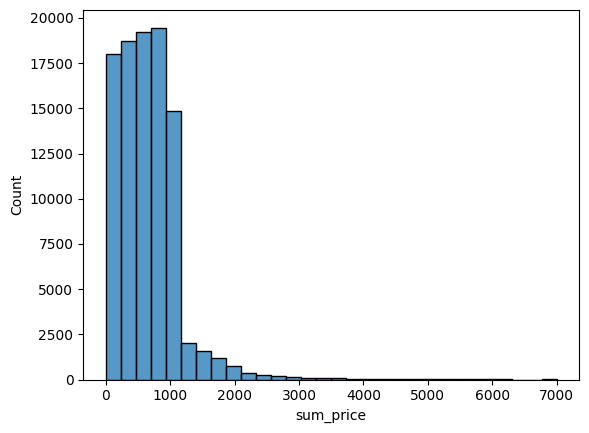

In [142]:
#Histogram of the total spent of the clients, including all the orders
sns.histplot(df_clients['sum_price'], bins = 30, binrange = (0,7000))

In [ ]:
#Histogram of the total spent of the clients, including all the orders
sns.histplot(df_clients['sum_price'], bins = 30, binrange = (0,7000))

##### Feature: State

In [197]:
df_clients['client_state'].value_counts(normalize=True).head()

SP    0.419516
RJ    0.129238
MG    0.116961
RS    0.055020
PR    0.050671
Name: client_state, dtype: float64

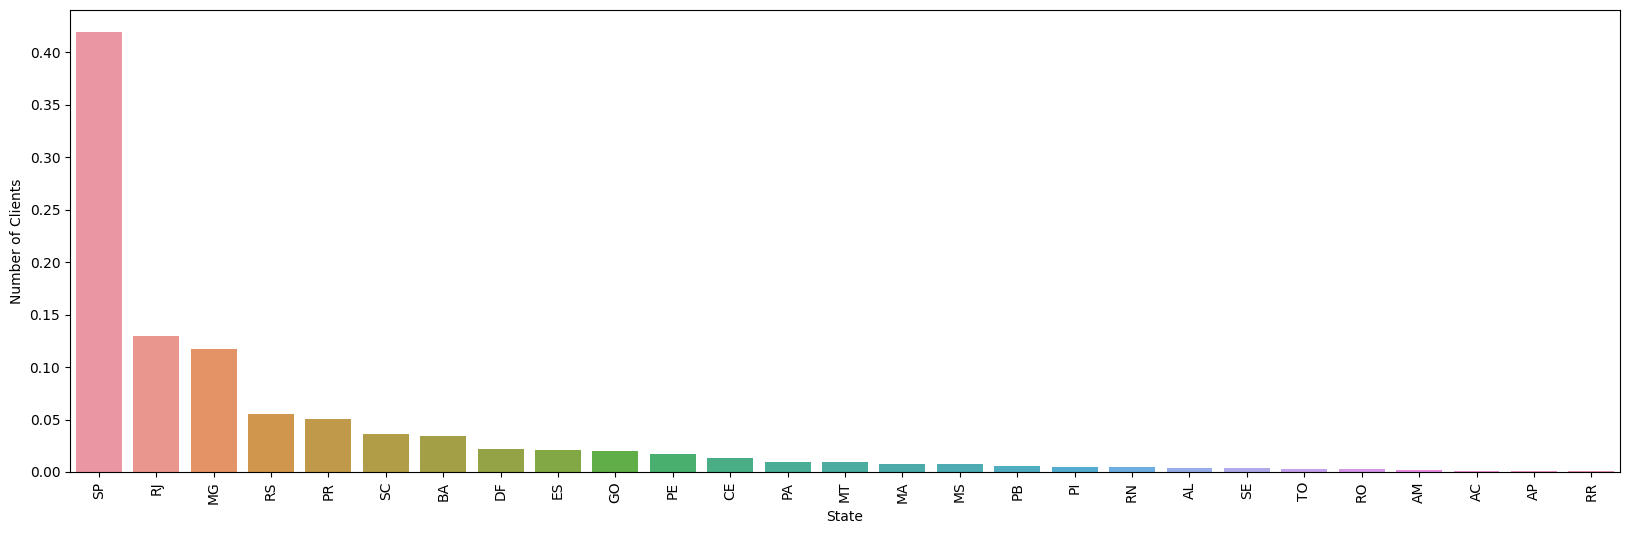

In [196]:
plt.figure(figsize=(20, 6))

#Create an aux dataframe
aux = df_clients['client_state'].value_counts(normalize=True).sort_values(ascending=False)

# create bar plot of sorted state counts with seaborn
sns.barplot(x=aux.index, y=aux.values)

# set axis labels and rotate x-axis labels
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)

# display plot
plt.show()

### 3.3) ABC method

*Desconsidered* (explanation bellow)

Classifying customers may assist you to streamline your sales activities and help you focus on achieving the desired business goals. The ABC method is the most commonly used.

- Category A: Top 20% of customers who generate 80% of the total revenue.
- Category B: Middle 30% of customers who generate 15% of the total revenue.
- Category C: Bottom 50% of customers who generate 5% of the total revenue.

In [128]:
print("20% of the clients represents "+ str(int(len(df_clients)*0.2))+" clients which have "+
     str(round(df_clients.iloc[:int(len(df_clients)*0.2),5].sum()/df_clients.iloc[:,5].sum()*100,2)) + "% of the the revenue")

20% of the clients represents 19451 clients which have 40.67% of the the revenue


The 20% of the clients with the most expensive orders do not generate 80% of the company's revenue

*DESCONSIDERED*